# Open Data 19

| Masse (kg) |	Zeit (t) |	Distanz (m) |
|-----------|-------------|-------------|


Data from [© 2019 Eniwa AG](https://www.eniwa.ch/)
GIS-Daten – Challenge Unterhalt / Ausbau

STROM


| Datensatz      |  Beschrieb – Datensatz | Attribut
|-----------|-------------|
|EW_VERBR	       | Verbraucher | FID | Eindeutiger Schlüssel GIS
|	|     |SAP_ID |Hausanschluss-Nummer, gemeinsamer Schlüssel GIS & SAP
| | |AO_TYP |	Anschlussobjekt-Typ
|EW_TS|Trafostation | FID | Eindeutiger Schlüssel GIS
|||NAME	|	Name der Trafostation, Referenz zu Stranglisten
|EW_VK	       | Verteilkabine  | FID | Eindeutiger Schlüssel GIS
|||NAME	|	Name der Trafostation, Referenz zu Stranglisten
|EW_LTG	 | Niederspannung Leitung         |     FID | Eindeutiger Schlüssel GIS 
|||ART	| Leitungsart
|||TYP	| Leitungstyp
||||



In [140]:
import pandas as pd
import geopandas as gpd
import numpy as np

from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz
from mapboxgl.utils import *
from mapboxgl.viz import *

In [141]:
#
import pysal.esda.mapclassify as mapclassify

In [142]:
#
from pyproj import Proj
import json

In [143]:
token = 'here shoulb be your token as string'

In [197]:
fname = "ew_verbr_84.geojson"
df_verbr = gpd.read_file(fname)
df_verbr.head()

,FID,SAP_ID,AO_TYP,geometry
0,494151,724107,Infrastruktur,POINT (8.059794674712466 47.40625118440816)
1,494336,720181,Einfamilienhaus,POINT (8.05001756447539 47.40916123493167)
2,494300,721183,Einfamilienhaus,POINT (8.046984736066145 47.40750788519985)
3,494301,720067,Einfamilienhaus,POINT (8.04393639861269 47.41127450969274)
4,494302,720069,Einfamilienhaus,POINT (8.043693959447666 47.41121594714435)


In [370]:
df_verbr = gpd.read_file("ew_verbr_84.geojson")
lon = []
lat = []
for d in df_verbr.geometry:
    split = str(d).split("POINT")[1]
    split = split.split("(")[1]
    split = split.split(")")[0]
    lat.append( float( split.split(" ")[0] ) )
    lon.append ( float( split.split(" ")[1] ) )


df_verbr['lon'] = lon
df_verbr['lat'] = lat
df_verbr['ew_verbr'] = 1.0
print ( len(df_verbr))
df_verbr.head()

1879


,FID,SAP_ID,AO_TYP,geometry,lon,lat,ew_verbr
0,494151,724107,Infrastruktur,POINT (8.059794674712466 47.40625118440816),47.406251,8.059795,1.0
1,494336,720181,Einfamilienhaus,POINT (8.05001756447539 47.40916123493167),47.409161,8.050018,1.0
2,494300,721183,Einfamilienhaus,POINT (8.046984736066145 47.40750788519985),47.407508,8.046985,1.0
3,494301,720067,Einfamilienhaus,POINT (8.04393639861269 47.41127450969274),47.411275,8.043936,1.0
4,494302,720069,Einfamilienhaus,POINT (8.043693959447666 47.41121594714435),47.411216,8.043694,1.0


In [212]:

df_to_geojson(df_verbr, filename='test.geojson', properties=['FID', 'SAP_ID', 'AO_TYP'], lat='lon', lon='lat', precision=4)

{'type': 'file', 'filename': 'test.geojson', 'feature_count': 1879}

In [214]:
#color_breaks = [i for i in range(1,300,36)]
color_breaks = mapclassify.Natural_Breaks(df_verbr['FID'], k=8, initial=0).bins
color_stops = create_color_stops(color_breaks, colors='YlOrRd')

viz = CircleViz('test.geojson',
                access_token=token,
                height='700px',
                color_property = "FID",
                color_stops = color_stops,
                center = (8.059795, 47.4),
                zoom = 13,
                below_layer = 'waterway-label'
              )
viz.show()

In [206]:
df_vk = gpd.read_file("ewVK_84.geojson")
df_vk.head()

,FID,NAME,geometry
0,42918,VK 0091,POINT (8.048939927392786 47.4183245060532)
1,42945,VK 0378,POINT (8.046544704348172 47.40707563244804)
2,42992,VK 0381,POINT (8.050026777276999 47.41457590367361)
3,43037,VK 0368,POINT (8.045638632419548 47.41462849584516)
4,43088,VK 0495,POINT (8.057490372744057 47.41225223395714)


In [438]:

df_vk = gpd.read_file("ewVK_84.geojson")
df_vk.head()
lon = []
lat = []
for d in df_vk.geometry:
    split = str(d).split("POINT")[1]
    split = split.split("(")[1]
    split = split.split(")")[0]
    lat.append( float( split.split(" ")[0] ) )
    lon.append ( float( split.split(" ")[1] ) )


df_vk['lon'] = lon
df_vk['lat'] = lat

df_vk['ew_vk'] = 2.0
print (len(df_vk))
df_to_geojson(df_vk, filename='testVK.geojson', properties=['FID'], lat='lon', lon='lat', precision=4)
df_vk.head()

109


,FID,NAME,geometry,lon,lat,ew_vk
0,42918,VK 0091,POINT (8.048939927392786 47.4183245060532),47.418325,8.048940,2.0
1,42945,VK 0378,POINT (8.046544704348172 47.40707563244804),47.407076,8.046545,2.0
2,42992,VK 0381,POINT (8.050026777276999 47.41457590367361),47.414576,8.050027,2.0
3,43037,VK 0368,POINT (8.045638632419548 47.41462849584516),47.414628,8.045639,2.0
4,43088,VK 0495,POINT (8.057490372744057 47.41225223395714),47.412252,8.057490,2.0


In [460]:
df_ts = gpd.read_file("ew_ts.geojson")
print (len(df_ts))
df_ts.head()
lon = []
lat = []
for d in df_ts.geometry:
    split = str(d).split("POINT")[1]
    split = split.split("(")[1]
    split = split.split(")")[0]
    lat.append( float( split.split(" ")[0] ) )
    lon.append ( float( split.split(" ")[1] ) )


df_ts['lon'] = lon
df_ts['lat'] = lat
#
df_ts['ew_ts'] = 3.0

df_ts.head()

33


,FID,NAME,geometry,lon,lat,ew_ts
0,42007,TS Vorstadtstrasse,POINT (8.047044358632391 47.41458102316585),47.414581,8.047044,3.0
1,42008,TS SchÃ¼tzenhaus,POINT (8.033751102215403 47.41592952621465),47.415930,8.033751,3.0
2,42010,TS Asperchlus,POINT (8.053880765150771 47.42490918636217),47.424909,8.053881,3.0
3,42011,TS Giebelweg,POINT (8.054654799263812 47.42180825131681),47.421808,8.054655,3.0
4,42013,TS Benkenstrasse,POINT (8.043168408858019 47.41980645987094),47.419806,8.043168,3.0


In [499]:
print (len(df_vk))
print (len(df_verbr))
#df = pd.DataFrame({'FID': df_vk.FID.append(df_verbr.FID), 'lon': df_vk.lon.append(df_verbr.lon), 'lat':df_vk.lat.append(df_verbr.lat) })
fid = [i for i in df_vk.FID.append(df_verbr.FID)]
for i in df_ts.FID: fid.append(i)

lon = [ i for i in df_vk.lon.append(df_verbr.lon ) ]
for i in df_ts.lon: lon.append(i)
lat = [ i for i in df_vk.lat.append(df_verbr.lat ) ]
for i in df_ts.lat: lat.append(i)
#
ew_type = [i for i in df_vk.ew_vk.append(df_verbr.ew_verbr )]
for i in df_ts.ew_ts: ew_type.append(i)
#
df = pd.DataFrame({'FID':fid, 'lon':lon, 'lat':lat, 'ew_type':ew_type })


df_to_geojson(df, filename='test_df.geojson', properties=['FID','ew_type'], lat='lon', lon='lat', precision=4)
#df_to_geojson(df, filename='test_df.geojson', properties=['FID', 'ew_type'], lat='lon', lon='lat', precision=4)
#
print (len(df))
df.head()


109
1879
2021


,FID,lon,lat,ew_type
0,42918,47.418325,8.048940,2.0
1,42945,47.407076,8.046545,2.0
2,42992,47.414576,8.050027,2.0
3,43037,47.414628,8.045639,2.0
4,43088,47.412252,8.057490,2.0


In [500]:
#color_breaks = [i for i in range(1,300,36)]
color_breaks = [1,2,3]
color_stops = create_color_stops(color_breaks, colors='YlOrRd')

# Generate radius breaks from data domain and circle-radius range
radius_breaks = [1,2,3]
radius_stops = create_radius_stops(radius_breaks, 2, 8)
print (radius_stops)


# Create the viz
viz2 = GraduatedCircleViz('test_df.geojson', 
                        access_token=token,
                        color_property = "ew_type",
                        color_stops = color_stops,
                        radius_property = "ew_type",
                        radius_stops = radius_stops,
                        center = (8.059795, 47.4),
                        zoom = 13,
                        below_layer = 'waterway-label')
#viz2.label_property = "ew_type"
viz2.show()

[[1, 2.0], [2, 4.0], [3, 6.0]]


0.00018524558626889807


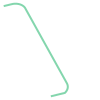

In [512]:
df_ltg = gpd.read_file("ew_ltg_84.geojson")
df_ltg.head()
print(df_ltg.geometry[2].length)
df_ltg.geometry[2]

0.00018893490543528646


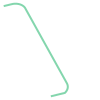

In [517]:
for l in range(0, len(df_ltg.geometry)):
    print (df_ltg.geometry[l].length)
    break
df_ltg.geometry[2]

In [436]:
#https://github.com/mapbox/mapboxgl-jupyter/blob/master/examples/notebooks/linestring-viz.ipynb
# make viz with GeoJSON source
vizLine = LinestringViz('ew_ltg_84.geojson', 
                    access_token=token,
                    color_property='sample',
                    color_stops=create_color_stops([0, 50, 100, 500, 1500], colors='Blues'),
                    line_stroke='--',
                    line_width_property='weight',
                    line_width_stops=create_numeric_stops([0, 1, 2, 3, 4, 5], 0, 10),
                    opacity=0.8,
                    center = (8.059795, 47.4),
                    zoom=12,
                    below_layer='waterway-label')
vizLine.show()